### Special Topics: Deep Learning: Sheet 1| COMP 499/691
### Student Name: Hussein Abdallah
### Assignment 01 Answer

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import timeit

In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# 1.B

In [43]:
param_dict={
    "W1": torch.randn((13, 20), requires_grad=True),
    "W2": torch.randn((20, 10), requires_grad=True),
    "W3": torch.randn((10, 1), requires_grad=True),
    "B1": torch.randn((20), requires_grad=True),
    "B2": torch.randn((10), requires_grad=True),
    "B3": torch.randn((1), requires_grad=True)
       }

In [47]:
## Define the network
def my_nn(input,param_dict): 
    W1=param_dict["W1"]
    W2=param_dict["W2"]
    W3=param_dict["W3"]
    B1=param_dict["B1"]
    B2=param_dict["B2"]
    B3=param_dict["B3"]
    h1 = torch.tanh((input @ W1) + B1)
    h2 = torch.tanh((h1 @ W2) + B2)
    output = h2 @ W3 + B3
#     output=torch.flatten(output.reshape(-1,1))
    return output/1000



## 1.E

In [48]:
example_data = torch.randn(( 20,13))
# example_data

## 1.D

In [53]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
y= torch.as_tensor(y).float()
# print(X)

loss_fn = torch.nn.MSELoss(size_average=False)
train_losses = []
train_counter = []
parameter_list = param_dict.values()
optimizer = optim.SGD(parameter_list, lr=0.001,momentum=0.01)
start = timeit.default_timer()  
y_pred=[]
for i in range(15):
    optimizer.zero_grad()
    y_pred=my_nn(torch.as_tensor(X).float(),param_dict)
#     print(y)
#     print(y_pred)
#     print(y_pred[0].size())
#     print(y_pred)
#     print(y)
    loss = loss_fn(y_pred, y)
    print("MSE=",loss.item())
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    train_counter.append(i)



MSE= 96401352.0
MSE= 95561328.0
MSE= 94722312.0
MSE= 93892960.0
MSE= 93072504.0
MSE= 92261576.0
MSE= 91459680.0
MSE= 90667224.0
MSE= 89883904.0
MSE= 89109376.0
MSE= 88342960.0
MSE= 87585816.0
MSE= 86837600.0
MSE= 86097416.0
MSE= 85365352.0


### Boston dataset requires feature enginerring at frist

## 2.A

In [73]:
def exp_reducer(w,x):
    return torch.tanh_(w.mm(x))
import torch 
Tensors={"W1": torch.rand(30, 2, requires_grad=True),
"W2" : torch.rand(30, 30, requires_grad=True),
"W3" : torch.rand(10, 30, requires_grad=True),
"X":  torch.rand(2, 1, requires_grad=True)
}
y=torch.autograd.functional.jacobian(exp_reducer,(Tensors["W1"], Tensors["X"]),create_graph=True)
y=torch.autograd.functional.jacobian(exp_reducer,(Tensors["W2"], y[0][0][0]),create_graph=True)
y=torch.autograd.functional.jacobian(exp_reducer,(Tensors["W3"], y[0][0][0]),create_graph=True)
print(y[1].shape)

torch.Size([10, 30, 30, 30])


## 2.B

In [75]:
### import torch 
Tensors={"W1": torch.rand(30, 2, requires_grad=True),
"W2" : torch.rand(30, 30, requires_grad=True),
"W3" : torch.rand(10, 30, requires_grad=True),
"X":  torch.rand(2, 1, requires_grad=True)
}
# Tensors["X"].zero_grad()
y=torch.tanh_(Tensors["W1"].mm(Tensors["X"]))
# print(y)
y.sum().backward(retain_graph=True)
y=torch.tanh_(Tensors["W2"].mm(y))
y.sum().backward(retain_graph=True)
y=torch.tanh_(Tensors["W3"].mm(y))
y.sum().backward(retain_graph=True)
print("inp.grad")
print(Tensors["X"].grad)

inp.grad
tensor([[6.1222],
        [6.7758]])


## 2.e

Forward Mode AutoDif:
M^3 + M^2 Ops =O(M^3)
<br>Reverse Mode AutoDiff (Backprop):
M^2 + M^2 Ops= O(M^2)
<br>• Finite difference requires 2*D forward passes, with D parameters
<br>• Reverse Mode AD, often ~ 2x forward pass
<br>• Forward Mode AD speed / forward pass would increase with width

## 3.b

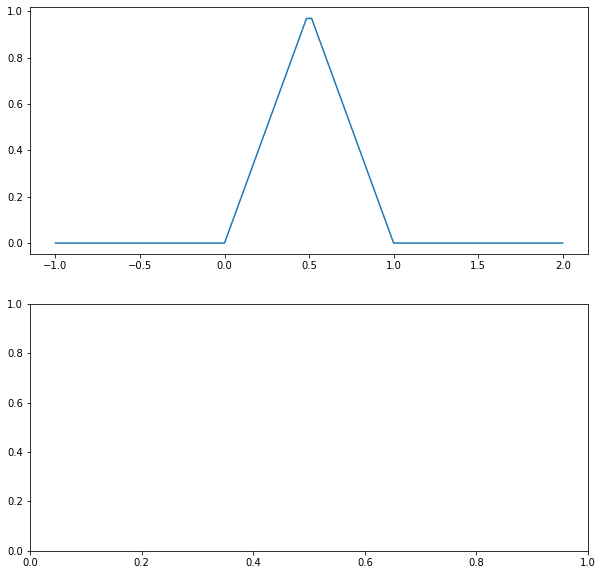

In [255]:
def my_fun(x):
    if x>0 and x<=0.5:
        return 2*x
    elif x>=0.5 and x<=1:
        return 2*(1-x)
    else:
        return 0

fig, axs = plt.subplots(2,figsize=(10,10))
x=np.linspace(-1,2,100)
y=[]
for i in x:
    y.append(my_fun(i))
axs[0].plot(x, y)

## 3.C

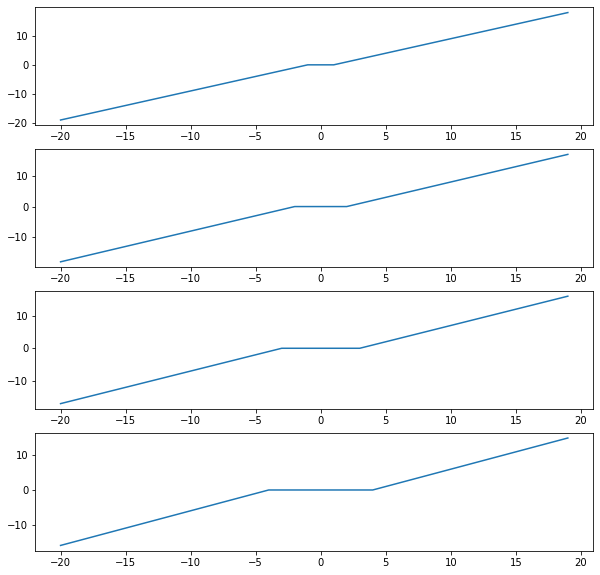

In [240]:
def my_fun(x,s):
    return max(abs(x)-s,0)*math.copysign(1, x)

start=20
x=range(-1*start,start)

s=[1,2,3,4]
fig, axs = plt.subplots(4,figsize=(10,10))
for z in s:
    y=[]
    for i in x:
        y.append(my_fun(i,z))
    axs[z-1].plot(x, y,label="s="+str(z)+",x=[-"+str(start)+","+str(start)+"]")
    

# 4.A

In [55]:
import torch.nn as nn
import torch.nn.functional as F

class my_model(nn.Module):
    def __init__(self, depth):
        super(my_model, self).__init__()
        self.depth=depth
        self.post_activation=np.zeros(self.depth)
        self.linears = nn.ModuleList([nn.Linear(28*28, 50)])
        self.linears.extend([nn.Linear(50, 50) for i in range(1, self.depth-1)])
        self.linears.append(nn.Linear(50, 10))

    def forward(self, x):
        x=  x.view(-1, 28*28)
        x.requires_grad_(True)
        for i in range(len(self.linears)):
            x =F.tanh(self.linears[i](x))
#             x =F.sigmoid(self.linears[i](x))
            self.post_activation[i]=(self.post_activation[i]+ F.log_softmax(x).mean())/2
        return F.softmax(x)
    

## 4.B

In [ ]:
def xavier(ni,no):
    return np.random.randn(ni,no)*np.math.sqrt(6/(ni+no))
xavier(100,100)

def weights_init_uniform(m,d):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    for layer in model.linears:
        # apply a uniform distribution to the weights and a bias=0
        layer.weight.data.uniform_(-1*d, d)
        layer.bias.data.fill_(0)
    return m

In [ ]:
batch_size_train=32
batch_size_test=32
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)

## 4.C

In [160]:
ds=[0.01,0.1,2]
loss=torch.nn.CrossEntropyLoss()
models=[]
for d in ds:
    model = my_model(8)
    model=weights_init_uniform(model,d)
    models.append(model)
    
for model in models:   
    model.train()
#     print(model)
#     print(model.linears[1].weight.data)
#     print(model.linears[1].bias.data)
    for batch_idx, (data, target) in enumerate(train_loader):
#         optimizer.zero_grad()
        output = model(data)        
#         print( output.shape)
        output.retain_grad()
#         print(target.shape)
        loss =  F.nll_loss(output, target)
        loss.backward()


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


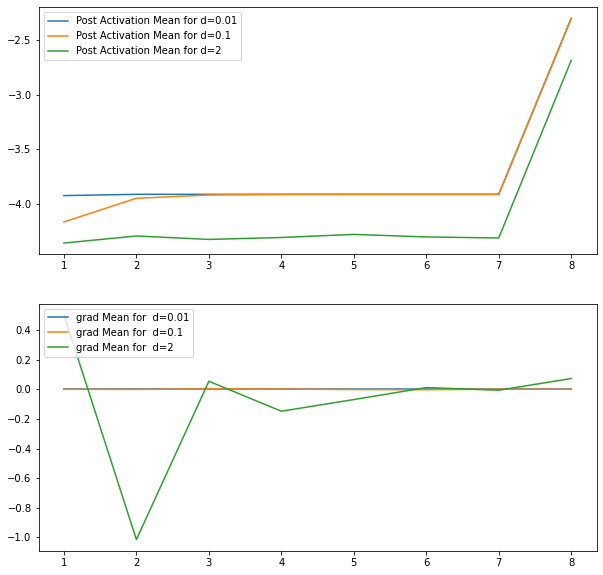

In [171]:
a=range(1,len(model.linears)+1)
idx=0

fig, axs = plt.subplots(2,figsize=(10,10))

for model in models:  
    c=[]
    for l in model.linears:
        c.append(l.weight.grad.mean())
    axs[0].plot(a, model.post_activation, label="Post Activation Mean for d="+str(ds[idx]))
    axs[1].plot(a, c, label="grad Mean for  d="+str(ds[idx]))
    idx=idx+1

axs[1].legend(loc="upper left")
axs[0].legend(loc="upper left")




## 4.D

In [188]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 0 [59968/60000 (100%)]	Loss: 2.115380
Train Epoch: 1 [59968/60000 (100%)]	Loss: 1.042703
Train Epoch: 2 [59968/60000 (100%)]	Loss: 0.677108
Train Epoch: 3 [59968/60000 (100%)]	Loss: 0.645059
Train Epoch: 4 [59968/60000 (100%)]	Loss: 0.653246


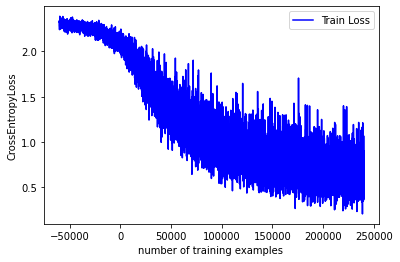

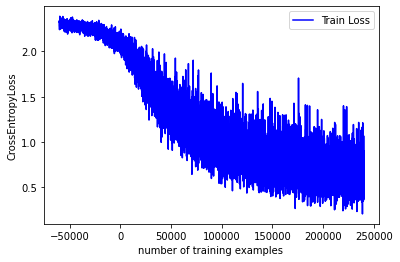

In [189]:
criterion=torch.nn.CrossEntropyLoss()
model = Net() 
train_losses = []
train_counter = []
optimizer = optim.SGD(model.parameters(), lr=0.001,momentum=0.01)
for epoch in range(5):             
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)        
    #         print( output.shape)
            output.retain_grad()
    #         print(target.shape)
            loss =  criterion(output, target)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
            train_counter.append((batch_idx*32) + (epoch*len(train_loader.dataset)))
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of training examples ')
plt.ylabel('CrossEntropyLoss')
fig
              


for d= 0.01


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 0 [59968/60000 (100%)]	Loss: 2.302585
Train Epoch: 1 [59968/60000 (100%)]	Loss: 2.302586
for d= 0.1
Train Epoch: 0 [59968/60000 (100%)]	Loss: 2.302576
Train Epoch: 1 [59968/60000 (100%)]	Loss: 2.302577
for d= 2
Train Epoch: 0 [59968/60000 (100%)]	Loss: 2.301005
Train Epoch: 1 [59968/60000 (100%)]	Loss: 2.286055


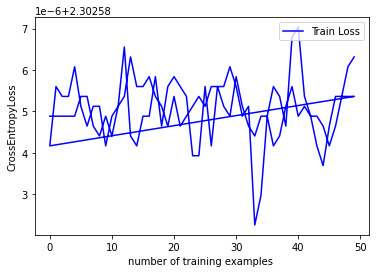

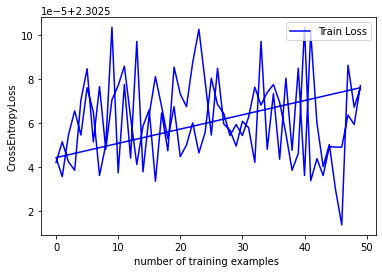

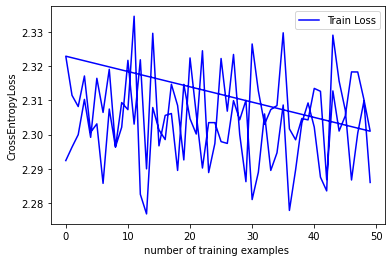

In [203]:
ds=[0.01,0.1,2]
criterion=torch.nn.CrossEntropyLoss()
models=[]

for d in ds:
    model = my_model(8)
    model=weights_init_uniform(model,d)     
    train_losses = []
    train_counter = []
    optimizer = optim.SGD(model.parameters(), lr=0.001,momentum=0.01)
    print("for d=",d)
    for epoch in range(2):             
            model.train()
            for batch_idx, (data, target) in enumerate(train_loader):
#                 print(batch_idx)
                if batch_idx<50 :
                    optimizer.zero_grad()
                    output = model(data)        
            #         print( output.shape)
                    output.retain_grad()
            #         print(target.shape)
                    loss =  criterion(output, target)
                    loss.backward()
                    optimizer.step()
                    train_losses.append(loss.item())
                    train_counter.append(batch_idx)
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
            
    fig = plt.figure()
    plt.plot(train_counter, train_losses, color='blue')
    plt.legend(['Train Loss'], loc='upper right')
    plt.xlabel('number of training examples ')
    plt.ylabel('CrossEntropyLoss')
    fig
              


## 4.E

<p> <li>Model does not generalize well regradless of depth </p>
<p> <li>Model Train loss still fluctuate with more epochs </p>
<p> <li>different Weight Intializations do not help</p>
<p> <li>CNN can capture more complex features so genralize well with less depth and ephocs</p>
